## Problem-50

In [5]:
import pandas as pd
import numpy as np
import sklearn

valid_publishers = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com','Daily Mail']
columns = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
files = ['train', 'valid', 'test']
label_map = {'b':0, 'e': 1, 'm':2, 't':3}
categs = ['busi.', 'enter.', 'health', 'science']
no_publisher = ['4557', '14204']

In [6]:
df = pd.read_csv('NewsAggregatorDataset/newsCorpora.csv', sep='\t', quoting=3, names=columns)
data = None
with open('NewsAggregatorDataset/newsCorpora.csv', 'r') as infile:
    data = infile.readlines()
data = [d.split('\t') for d in data]
data_id = [d[0] for d in data]
df_id = list(df.ID)
data_id_int = [int(id_) for id_ in data_id]
len(data_id), len(df_id)

(422937, 422937)

In [7]:
df = df[df.PUBLISHER.isin(valid_publishers)]

print(df.groupby('PUBLISHER')['PUBLISHER'].count())
df = df.sample(frac=1)
train_split = df.sample(frac=0.8, random_state=43)
test_valid_split = df.drop(train_split.index)
valid_split = test_valid_split.sample(frac=0.5, random_state=43)
test_split = test_valid_split.drop(valid_split.index)

PUBLISHER
Businessweek        2395
Contactmusic.com    2339
Daily Mail          2260
Huffington Post     2458
Reuters             3904
Name: PUBLISHER, dtype: int64


In [8]:
print(len(train_split), len(valid_split), len(test_split))
print(len(df))
# train_split.index, valid_split.index, test_split.index
# train_split.to_csv(r'NewsAggregatorDataset/train.txt', index=None, sep='\t', mode='a')
# valid_split.to_csv(r'NewsAggregatorDataset/valid.txt', index=None, sep='\t', mode='a')
# test_split.to_csv(r'NewsAggregatorDataset/test.txt', index=None, sep='\t', mode='a')

10685 1336 1335
13356


In [9]:
split_dfs = {split:pd.read_csv(f'NewsAggregatorDataset/{split}.txt', sep='\t') for split in files}
for split, df in split_dfs.items():
    print(split)
    print(df.groupby('CATEGORY')['CATEGORY'].count())

train
CATEGORY
b    4500
e    4221
m     732
t    1219
Name: CATEGORY, dtype: int64
valid
CATEGORY
b    562
e    542
m     83
t    147
Name: CATEGORY, dtype: int64
test
CATEGORY
b    565
e    516
m     95
t    158
Name: CATEGORY, dtype: int64


## Problem-51 & Problem-52

In [10]:
import nltk
from collections import Counter
import pickle as pkl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [11]:
# designing features by yourself
all_titles = ' '.join(list(split_dfs['train']['TITLE']))
words_in_title = Counter(all_titles.split())
title_features = {}
for i, j in words_in_title.items():
    title_features[i] = 0
# def get_feature(x):
# words_in_title.most_common(10)

In [12]:
vectorizer = CountVectorizer(stop_words='english')
train_data = vectorizer.fit_transform(list(split_dfs['train']['TITLE'])).toarray()
train_labels = np.array(split_dfs['train']['CATEGORY'].apply(lambda x: label_map[x]))
valid_data = vectorizer.transform(list(split_dfs['valid']['TITLE'])).toarray()
valid_labels = np.array(split_dfs['valid']['CATEGORY'].apply(lambda x: label_map[x]))
test_data = vectorizer.transform(list(split_dfs['test']['TITLE'])).toarray()
test_labels = np.array(split_dfs['test']['CATEGORY'].apply(lambda x: label_map[x]))
# vectorizer.get_feature_names()

In [13]:
train_data.shape, train_labels.shape

((10672, 12488), (10672,))

In [14]:
classifier = LogisticRegression()
classifier.fit(train_data, train_labels)

LogisticRegression()

## Problem-53 & Problem-54

In [15]:
from sklearn.metrics import accuracy_score
np.set_printoptions(precision=2)
def get_predict_and_proba(classifier_, data_):
    return classifier_.predict(data_), classifier_.predict_proba(data_) 

In [16]:
tr_preds, tr_probs = get_predict_and_proba(classifier, train_data)
# print(tr_preds[0:10], tr_probs[0:10])

preds, probs = get_predict_and_proba(classifier, test_data)


print(f'Training set accuracy: {round(accuracy_score(train_labels, tr_preds), 3)}')
print(f'Test set accuracy: {round(accuracy_score(test_labels, preds), 3)}')

Training set accuracy: 0.996
Test set accuracy: 0.918


## Problem-55

array([[4487,    6,    1,    6],
       [   5, 4214,    0,    2],
       [   1,    2,  729,    0],
       [  17,    7,    0, 1195]])

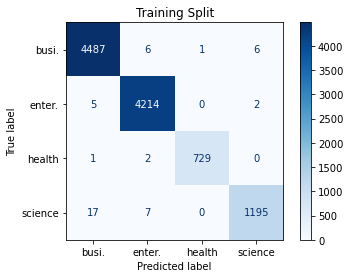

In [17]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
#Consusion matrix for training split
disp = plot_confusion_matrix(classifier, train_data, train_labels, display_labels=categs, cmap=plt.cm.Blues)
disp.ax_.set_title('Training Split')
confusion_matrix(train_labels, tr_preds)

array([[541,  13,   1,  10],
       [ 11, 505,   0,   0],
       [ 12,  17,  63,   3],
       [ 19,  23,   1, 115]])

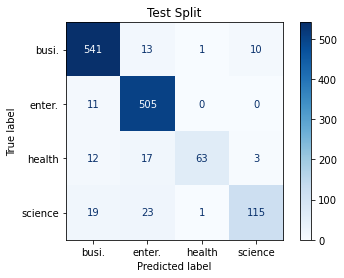

In [18]:
#Confusion matrix for test split
disp = plot_confusion_matrix(classifier, test_data, test_labels, display_labels=categs, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Split')
confusion_matrix(test_labels, preds)

## Problem-56

In [19]:
from sklearn.metrics import precision_recall_fscore_support

In [20]:
precision_recall_fscore_support(test_labels, preds)

(array([0.93, 0.91, 0.97, 0.9 ]),
 array([0.96, 0.98, 0.66, 0.73]),
 array([0.94, 0.94, 0.79, 0.8 ]),
 array([565, 516,  95, 158]))

In [25]:
2*0.93*0.96/ (0.93+0.96)

0.9447619047619047

In [22]:
precision_recall_fscore_support(test_labels, preds, average='micro')

(0.9175412293853074, 0.9175412293853074, 0.9175412293853074, None)

In [21]:
precision_recall_fscore_support(test_labels, preds, average='macro')

(0.9251612559992334, 0.8318025726097764, 0.8686535496059102, None)

## Problem-57

In [30]:
importance = classifier.coef_
print(importance.shape)
features = vectorizer.get_feature_names()
for i in range(importance.shape[0]):
    print(categs[i])
#     abs_importance = np.absolute(importance[i])
    abs_importance = importance[i]
#     print(abs_importance.shape)
    top = np.argsort(abs_importance)[::-1][10:]
    bottom = np.argsort(abs_importance)[:10]
    print(f'Most Important\t\t\tLeast Important')
    for j, k in zip(top, bottom):
        print(f'{features[j].strip()}\t\t\t{features[k].strip()}')
    print('\n')
    

(4, 12488)
busi.
Most Important			Least Important
china			activision
dollar			aereo
mcdonald			ebola
inflation			twitch
buy			heartbleed
uber			nintendo
india			star
fitch			subscription
profit			microsoft
revenue			woman


enter.
Most Important			Least Important
cannes			google
film			gm
jay			facebook
beyonce			china
kim			billion
met			apple
fans			study
george			obamacare
hbo			data
jennifer			ebola


health
Most Important			Least Important
brain			gm
aids			facebook
alzheimer			dimon
heart			climate
abortion			apple
cigarette			amazon
woman			explain
health			twitter
children			estimates
virus			jobs


science
Most Important			Least Important
fcc			stocks
earth			valued
neutrality			percent
moon			men
iphone			fed
nintendo			american
nasa			kids
hackers			drug
playstation			brand
planet			plane




## problem 58

In [31]:
from tqdm import tqdm

tr_acc = []
val_acc = []
test_acc = []

for i in tqdm(np.logspace(-4, 5, 10)):
    lg = LogisticRegression(random_state=123, max_iter=1000,C = i)
    lg.fit(train_data, train_labels)
    tr_pred, _ = get_predict_and_proba(lg, train_data)
    tr_acc.append(accuracy_score(train_labels, tr_pred))
    val_pred, _ = get_predict_and_proba(lg, valid_data)
    val_acc.append(accuracy_score(valid_labels, val_pred))
    test_pred, _ = get_predict_and_proba(lg, test_data)
    test_acc.append(accuracy_score(test_labels, test_pred))
    

 80%|████████  | 8/10 [01:49<00:43, 21.71s/it]/Users/vipulmishra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 90%|█████████ | 9/10 [03:25<00:43, 44.00s/it]/Users/vipulmishra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

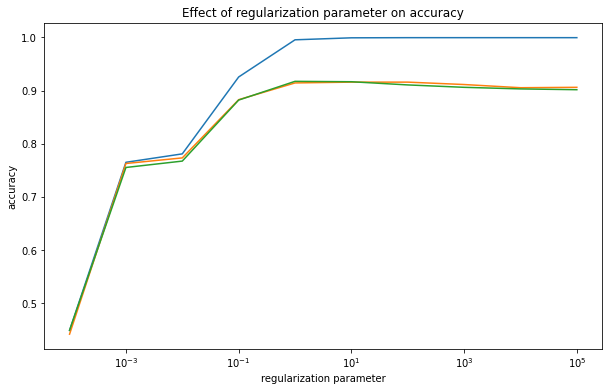

In [29]:
plt.figure(figsize=(10,6))
plt.title('Effect of regularization parameter on accuracy')
plt.xscale('log')
plt.xlabel('regularization parameter')
plt.ylabel('accuracy')
plt.plot(np.logspace(-4, 5, 10), tr_acc)
plt.plot(np.logspace(-4, 5, 10), val_acc)
plt.plot(np.logspace(-4, 5, 10), test_acc)

## Problem 59 (Don't run on small machines)

In [23]:
classifier_models = {'ensemble': 'RandomForestClassifier', 'linear_model': 'SGDClassifier', 'svm': 'LinearSVC'}
prefix = 'sklearn.'
import importlib
# all_models loaded in this way
for module_, class_ in classifier_models.items():
    module = importlib.import_module(prefix+module_)
    model = getattr(module, class_)
    model = model()
    model.fit(train_data, train_labels)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    print(class_)
    print('train_accuracy', round(accuracy_score(train_labels, train_pred),3), sep=' : ')
    print('test_accuracy',accuracy_score(test_labels, test_pred), sep=' : ')
    print()

RandomForestClassifier
train_accuracy : 1.0
test_accuracy : 0.8620689655172413
SGDClassifier
train_accuracy : 0.998
test_accuracy : 0.9137931034482759
LinearSVC
train_accuracy : 0.999
test_accuracy : 0.9100449775112444


In [ ]:
train_hp_data = np.copy(train_data)
train_hp_labels = np.copy(train_labels)
valid_hp_data = np.copy(valid_data)
valid_hp_labels = np.copy(valid_labels)

print(train_hp_data.shape, valid_hp_data.shape)

param_data = np.concatenate((train_hp_data, valid_hp_data), axis=0)
param_labels = np.concatenate((train_hp_labels, valid_hp_labels), axis=0)
param_train.shape, param_labels.shape

In [24]:
#grid searching the hyperparameters to find the optimal hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 100, 1000],
   'penalty': ['l2', 'l1'],
   'tol': [0.0001, 0.001, 0.01],
   'max_iter':[100, 200, 500]}

lg_ = LogisticRegression()
print(lg_.get_params().keys())

clf = GridSearchCV(estimator=lg_, param_grid=param_grid, scoring="accuracy", cv=[(np.arange(0, 10672), np.arange(10672, 12006))], verbose=2)
clf.fit(param_data, param_labels)

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1], 'max_iter': [100, 200, 500]},
             scoring='accuracy')

In [26]:
clf.best_score_

0.9107956164167081

In [ ]:
preds = clf.best_estimator_.predict(test_data)
print(f'accuracy_score: {accuracy_score(test_labels, preds):.3f}')